In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('final_data.csv')

In [4]:
df.head(2)

,brand,4G,5G,Announced,Status,Weight,Diameter,Display Size,ppi,body ratio,OS,battery_capacity,Price,CPU,ratio,pixel,GPU,Chipset,RAM,Storage,Weight Cat,Diameter Cat,Display Size Cat,ppi Cat,body ratio Cat,battery_capacity Cat,Price Cat,WLAN_COUNT,pixel Cat,SIM_Micro-SIM,SIM_Mini-SIM,SIM_Nano-SIM,SIM_eSIM,Display Type_AMOLED,Display Type_LCD,Display Type_OLED,Display Type_Others,Display Type_Retina,Display Type_TFT
0,0,True,False,2022.0,0,172.0,10.0,5.5,293.0,74.0,0,3000.0,100.0,4.0,3,1036800.0,5,4,2.0,32.0,2,3,3,2,0,2,3,2,2,False,False,True,False,False,True,False,False,False,False
1,0,True,False,2021.0,0,190.0,9.7,6.1,282.0,78.1,0,3000.0,110.0,8.0,11,1123200.0,4,8,2.0,32.0,2,0,4,2,0,2,3,2,0,False,False,True,False,False,True,False,False,False,False


# Part 1

In [5]:
X = df.drop('OS' , axis=1)
Y = df['OS']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [6]:
X_tr_tr, X_val_tr, y_tr_tr, y_val_tr = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

## Handling Imbalaced Data

###### ADASYN

In [7]:
'''

ads=ADASYN(random_state=42)


X_tr_tr_balanced_adasyn, y_tr_tr_balanced_adasyn = ads.fit_resample(X_tr_tr, y_tr_tr)


print(X_tr_tr.shape, y_tr_tr.shape, np.unique(y_tr_tr, return_counts=True))

print('------------------------------------')

print('Balanced :')
print(X_tr_tr_balanced_adasyn.shape, y_tr_tr_balanced_adasyn.shape, np.unique(y_tr_tr_balanced_adasyn, return_counts=True))

'''

"\n\nads=ADASYN(random_state=42)\n\n\nX_tr_tr_balanced_adasyn, y_tr_tr_balanced_adasyn = ads.fit_resample(X_tr_tr, y_tr_tr)\n\nX_val_tr_balanced_adasyn, y_val_tr_balanced_adasyn = ads.fit_resample(X_val_tr, y_val_tr)\n\n\n\nprint(X_tr_tr.shape, y_tr_tr.shape, np.unique(y_tr_tr, return_counts=True))\nprint(X_val_tr.shape, y_val_tr.shape, np.unique(y_val_tr, return_counts=True))\n\nprint('------------------------------------')\n\nprint('Balanced :')\nprint(X_tr_tr_balanced_adasyn.shape, y_tr_tr_balanced_adasyn.shape, np.unique(y_tr_tr_balanced_adasyn, return_counts=True))\nprint(X_val_tr_balanced_adasyn.shape, y_val_tr_balanced_adasyn.shape, np.unique(y_val_tr_balanced_adasyn, return_counts=True))\n\n\n"

###### SMOTE

In [7]:
smt=SMOTE(random_state=42)


X_tr_tr_balanced_smote, y_tr_tr_balanced_smote = smt.fit_resample(X_tr_tr, y_tr_tr)


print(X_tr_tr.shape, y_tr_tr.shape, np.unique(y_tr_tr, return_counts=True))

print('------------------------------------')

print('Balanced :')
print(X_tr_tr_balanced_smote.shape, y_tr_tr_balanced_smote.shape, np.unique(y_tr_tr_balanced_smote, return_counts=True))

(1911, 38) (1911,) (array([0, 1, 2], dtype=int64), array([1765,   97,   49], dtype=int64))
------------------------------------
Balanced :
(5295, 38) (5295,) (array([0, 1, 2], dtype=int64), array([1765, 1765, 1765], dtype=int64))


## Scaling the data

In [8]:
df.columns

Index(['brand', '4G', '5G', 'Announced', 'Status', 'Weight', 'Diameter',
       'Display Size', 'ppi', 'body ratio', 'OS', 'battery_capacity', 'Price',
       'CPU', 'ratio', 'pixel', 'GPU', 'Chipset', 'RAM', 'Storage',
       'Weight Cat', 'Diameter Cat', 'Display Size Cat', 'ppi Cat',
       'body ratio Cat', 'battery_capacity Cat', 'Price Cat', 'WLAN_COUNT',
       'pixel Cat', 'SIM_Micro-SIM', 'SIM_Mini-SIM', 'SIM_Nano-SIM',
       'SIM_eSIM', 'Display Type_AMOLED', 'Display Type_LCD',
       'Display Type_OLED', 'Display Type_Others', 'Display Type_Retina',
       'Display Type_TFT'],
      dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

selected_features = ['brand', '5G', '4G', 'battery_capacity', 'CPU', 'GPU', 'WLAN_COUNT', 'Chipset', 'SIM_Micro-SIM', 'SIM_Mini-SIM', 'SIM_Nano-SIM',
       'SIM_eSIM', 'Display Type_AMOLED', 'Display Type_LCD',
       'Display Type_OLED', 'Display Type_Others', 'Display Type_Retina',
       'Display Type_TFT', 'Display Size Cat']

X_train_selected = X_tr_tr_balanced_smote[selected_features]

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [10]:
X_val_selected = X_val_tr[selected_features]

In [11]:
X_test_selected = X_test[selected_features]

## Model Selection and Scaling using GridSearch

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

param_grids = {
    'Decision Tree': {
        'max_depth': [3, 5, 7]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }
}

results = {}

for scaler_name, scaler in [('StandardScaler', scaler_standard), ('MinMaxScaler', scaler_minmax)]:
    X_val_scaled = scaler.fit_transform(X_val_selected) 
    for clf_name, clf in classifiers.items():
        grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='f1_weighted')
        grid_search.fit(X_val_scaled, y_val_tr) 
        results[(scaler_name, clf_name)] = grid_search
        
        print(f"Scaler: {scaler_name}, Classifier: {clf_name}")
        print("Best Score:", grid_search.best_score_)
        print("Best Parameters:", grid_search.best_params_)
        print()

Scaler: StandardScaler, Classifier: Decision Tree
Best Score: 0.9265427227801691
Best Parameters: {'max_depth': 7}

Scaler: StandardScaler, Classifier: Random Forest
Best Score: 0.9410030448861594
Best Parameters: {'n_estimators': 100}

Scaler: StandardScaler, Classifier: AdaBoost
Best Score: 0.9213312087679071
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}

Scaler: StandardScaler, Classifier: XGBoost
Best Score: 0.942839801287364
Best Parameters: {'learning_rate': 1, 'n_estimators': 200}

Scaler: MinMaxScaler, Classifier: Decision Tree
Best Score: 0.926052964182553
Best Parameters: {'max_depth': 5}

Scaler: MinMaxScaler, Classifier: Random Forest
Best Score: 0.9396646514642745
Best Parameters: {'n_estimators': 100}

Scaler: MinMaxScaler, Classifier: AdaBoost
Best Score: 0.9213312087679071
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}

Scaler: MinMaxScaler, Classifier: XGBoost
Best Score: 0.942839801287364
Best Parameters: {'learning_rate': 1, 'n_estimators

In [13]:
best_scores = {}
best_params = {}
for (scaler_name, clf_name), grid_search in results.items():
    best_scores[(scaler_name, clf_name)] = grid_search.best_score_
    best_params[(scaler_name, clf_name)] = grid_search.best_params_

In [14]:
best_scores

{('StandardScaler', 'Decision Tree'): 0.9265427227801691,
 ('StandardScaler', 'Random Forest'): 0.9410030448861594,
 ('StandardScaler', 'AdaBoost'): 0.9213312087679071,
 ('StandardScaler', 'XGBoost'): 0.942839801287364,
 ('MinMaxScaler', 'Decision Tree'): 0.926052964182553,
 ('MinMaxScaler', 'Random Forest'): 0.9396646514642745,
 ('MinMaxScaler', 'AdaBoost'): 0.9213312087679071,
 ('MinMaxScaler', 'XGBoost'): 0.942839801287364}

In [15]:
best_params

{('StandardScaler', 'Decision Tree'): {'max_depth': 7},
 ('StandardScaler', 'Random Forest'): {'n_estimators': 100},
 ('StandardScaler', 'AdaBoost'): {'learning_rate': 0.1, 'n_estimators': 100},
 ('StandardScaler', 'XGBoost'): {'learning_rate': 1, 'n_estimators': 200},
 ('MinMaxScaler', 'Decision Tree'): {'max_depth': 5},
 ('MinMaxScaler', 'Random Forest'): {'n_estimators': 100},
 ('MinMaxScaler', 'AdaBoost'): {'learning_rate': 0.1, 'n_estimators': 100},
 ('MinMaxScaler', 'XGBoost'): {'learning_rate': 1, 'n_estimators': 200}}

In [16]:
best_model_key = max(best_scores, key=best_scores.get)
best_model_key

('StandardScaler', 'XGBoost')

In [17]:
best_model = results[best_model_key].best_estimator_
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [18]:
X_train_scaled = scaler_standard.fit_transform(X_train_selected)

X_val_scaled = scaler_standard.transform(X_val_selected)

X_test_scaled = scaler_standard.transform(X_test_selected)

In [19]:
best_model.fit(X_train_scaled, y_tr_tr_balanced_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## Model Evaluation

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_val_pred_proba = best_model.predict_proba(X_val_scaled)

y_val_pred = best_model.predict(X_val_scaled)

accuracy_val = accuracy_score(y_val_tr, y_val_pred)
precision_val = precision_score(y_val_tr, y_val_pred, average='weighted')
recall_val = recall_score(y_val_tr, y_val_pred, average='weighted')
f1_val = f1_score(y_val_tr, y_val_pred, average='weighted')
auc_val = roc_auc_score(y_val_tr, y_val_pred_proba, multi_class='ovr')

print("Validation Metrics:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)
print("AUC Score:", auc_val)

Validation Metrics:
Accuracy: 0.9615384615384616
Precision: 0.9589180050718513
Recall: 0.9615384615384616
F1 Score: 0.9573792985164221
AUC Score: 0.9685459684581547


In [22]:
y_test_pred_proba = best_model.predict_proba(X_test_scaled)

y_test_pred = best_model.predict(X_test_scaled)

accuracy_test = accuracy_score(Y_test, y_test_pred)
precision_test = precision_score(Y_test, y_test_pred, average='weighted')
recall_test = recall_score(Y_test, y_test_pred, average='weighted')
f1_test = f1_score(Y_test, y_test_pred, average='weighted')
auc_test = roc_auc_score(Y_test, y_test_pred_proba, multi_class='ovr')

print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("AUC Score:", auc_test)

Test Metrics:
Accuracy: 0.9798488664987406
Precision: 0.9783299592211258
Recall: 0.9798488664987406
F1 Score: 0.9784632361760827
AUC Score: 0.9840589003117238


### Validation Metrics:
- **Accuracy:** The model correctly predicts about 96.15% of the validation data samples.
- **Precision:** When the model predicts a positive class label, it is correct about 95.89% of the time on average.
- **Recall:** The model identifies around 96.15% of the actual positive class instances in the validation dataset.
- **F1 Score:** The F1 score, which combines precision and recall, is approximately 95.74%.
- **AUC Score:** The high AUC score of 96.85% indicates that the model has strong discriminatory power between the positive and negative classes.

### Test Metrics:
- **Accuracy:** On the test dataset, the model achieves an accuracy of 97.98%.
- **Precision:** With a precision score of 97.83%, the model maintains a high level of accuracy when predicting positive class instances on the test data.
- **Recall:** The model captures about 97.98% of the actual positive class instances in the test dataset.
- **F1 Score:** The F1 score of 97.85% on the test data suggests a good balance between precision and recall.
- **AUC Score:** Despite being evaluated on unseen data, the AUC score of 98.41% on the test dataset indicates that the model's discriminatory power remains strong.

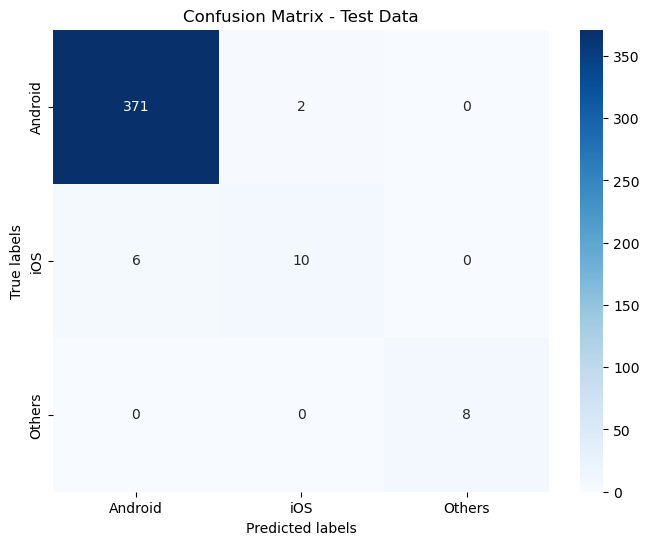

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Android', 'iOS', 'Others'], yticklabels=['Android', 'iOS', 'Others'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Data')
plt.show()

### Precision, Recall F1 score for each class

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_class_metrics(y_true, y_pred, class_labels):
    metrics = {}
    for label in class_labels:
        precision = precision_score(y_true == label, y_pred == label, average='binary')
        recall = recall_score(y_true == label, y_pred == label, average='binary')
        f1 = f1_score(y_true == label, y_pred == label, average='binary')
        metrics[label] = {'precision': precision, 'recall': recall, 'f1': f1}
    return metrics

In [25]:
class_labels = [0, 1, 2]
metrics = calculate_class_metrics(Y_test, y_test_pred, class_labels)

for label, values in metrics.items():
    print(f"Metrics for Class {label}:")
    print("Precision:", values['precision'])
    print("Recall:", values['recall'])
    print("F1 Score:", values['f1'])
    print()

Metrics for Class 0:
Precision: 0.9840848806366048
Recall: 0.9946380697050938
F1 Score: 0.9893333333333334

Metrics for Class 1:
Precision: 0.8333333333333334
Recall: 0.625
F1 Score: 0.7142857142857143

Metrics for Class 2:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



# Part 2

We just need to change the 'battery_capacity' in Selected_features to 'battery_capacity Cat'

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

selected_features = ['brand', '5G', '4G', 'battery_capacity Cat', 'CPU', 'GPU', 'WLAN_COUNT', 'Chipset', 'SIM_Micro-SIM', 'SIM_Mini-SIM', 'SIM_Nano-SIM',
       'SIM_eSIM', 'Display Type_AMOLED', 'Display Type_LCD',
       'Display Type_OLED', 'Display Type_Others', 'Display Type_Retina',
       'Display Type_TFT', 'Display Size Cat']

X_train_selected = X_tr_tr_balanced_smote[selected_features]

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()


X_val_selected = X_val_tr[selected_features]


X_test_selected = X_test[selected_features]


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

param_grids = {
    'Decision Tree': {
        'max_depth': [3, 5, 7]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }
}

results = {}

for scaler_name, scaler in [('StandardScaler', scaler_standard), ('MinMaxScaler', scaler_minmax)]:
    X_val_scaled = scaler.fit_transform(X_val_selected) 
    for clf_name, clf in classifiers.items():
        grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='f1_weighted')
        grid_search.fit(X_val_scaled, y_val_tr) 
        results[(scaler_name, clf_name)] = grid_search
        
        print(f"Scaler: {scaler_name}, Classifier: {clf_name}")
        print("Best Score:", grid_search.best_score_)
        print("Best Parameters:", grid_search.best_params_)
        print()

Scaler: StandardScaler, Classifier: Decision Tree
Best Score: 0.9444053486520589
Best Parameters: {'max_depth': 3}

Scaler: StandardScaler, Classifier: Random Forest
Best Score: 0.9461850575890765
Best Parameters: {'n_estimators': 200}

Scaler: StandardScaler, Classifier: AdaBoost
Best Score: 0.9168782708117899
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}

Scaler: StandardScaler, Classifier: XGBoost
Best Score: 0.9478123640984224
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}

Scaler: MinMaxScaler, Classifier: Decision Tree
Best Score: 0.9444053486520589
Best Parameters: {'max_depth': 3}

Scaler: MinMaxScaler, Classifier: Random Forest
Best Score: 0.9403032648719896
Best Parameters: {'n_estimators': 100}

Scaler: MinMaxScaler, Classifier: AdaBoost
Best Score: 0.9168782708117899
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}

Scaler: MinMaxScaler, Classifier: XGBoost
Best Score: 0.9478123640984224
Best Parameters: {'learning_rate': 0.1, 'n_esti

In [27]:
best_scores = {}
best_params = {}
for (scaler_name, clf_name), grid_search in results.items():
    best_scores[(scaler_name, clf_name)] = grid_search.best_score_
    best_params[(scaler_name, clf_name)] = grid_search.best_params_

In [28]:
best_model_key = max(best_scores, key=best_scores.get)
best_model = results[best_model_key].best_estimator_
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
X_train_scaled = scaler_standard.fit_transform(X_train_selected)

X_val_scaled = scaler_standard.transform(X_val_selected)

X_test_scaled = scaler_standard.transform(X_test_selected)

best_model.fit(X_train_scaled, y_tr_tr_balanced_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [30]:
y_val_pred_proba = best_model.predict_proba(X_val_scaled)

y_val_pred = best_model.predict(X_val_scaled)

accuracy_val = accuracy_score(y_val_tr, y_val_pred)
precision_val = precision_score(y_val_tr, y_val_pred, average='weighted')
recall_val = recall_score(y_val_tr, y_val_pred, average='weighted')
f1_val = f1_score(y_val_tr, y_val_pred, average='weighted')
auc_val = roc_auc_score(y_val_tr, y_val_pred_proba, multi_class='ovr')

print("Validation Metrics:")
print("Accuracy:", accuracy_val)
print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)
print("AUC Score:", auc_val)

Validation Metrics:
Accuracy: 0.9615384615384616
Precision: 0.9608341175672018
Recall: 0.9615384615384616
F1 Score: 0.9611606678004927
AUC Score: 0.9686820256234129


In [31]:
y_test_pred_proba = best_model.predict_proba(X_test_scaled)

y_test_pred = best_model.predict(X_test_scaled)

accuracy_test = accuracy_score(Y_test, y_test_pred)
precision_test = precision_score(Y_test, y_test_pred, average='weighted')
recall_test = recall_score(Y_test, y_test_pred, average='weighted')
f1_test = f1_score(Y_test, y_test_pred, average='weighted')
auc_test = roc_auc_score(Y_test, y_test_pred_proba, multi_class='ovr')

print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("AUC Score:", auc_test)

Test Metrics:
Accuracy: 0.9722921914357683
Precision: 0.9731473559603415
Recall: 0.9722921914357683
F1 Score: 0.9726934108723705
AUC Score: 0.9820786686181654


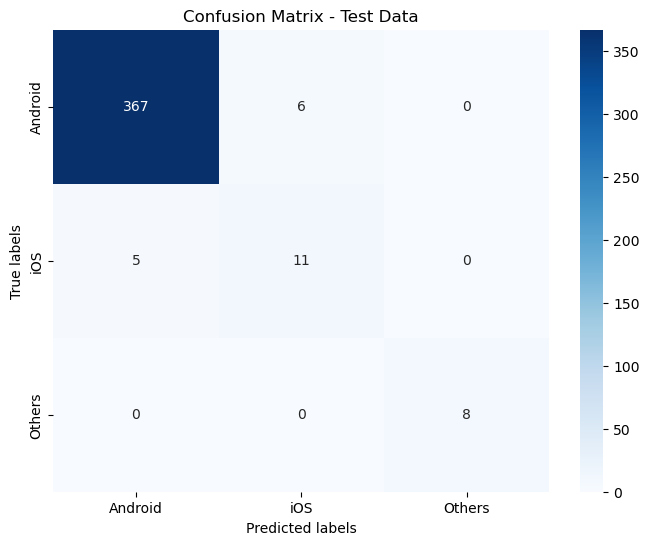

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Android', 'iOS', 'Others'], yticklabels=['Android', 'iOS', 'Others'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Data')
plt.show()

### Precision, Recall F1 score for each class

In [33]:
class_labels = [0, 1, 2]
metrics = calculate_class_metrics(Y_test, y_test_pred, class_labels)

for label, values in metrics.items():
    print(f"Metrics for Class {label}:")
    print("Precision:", values['precision'])
    print("Recall:", values['recall'])
    print("F1 Score:", values['f1'])
    print()

Metrics for Class 0:
Precision: 0.9865591397849462
Recall: 0.9839142091152815
F1 Score: 0.985234899328859

Metrics for Class 1:
Precision: 0.6470588235294118
Recall: 0.6875
F1 Score: 0.6666666666666667

Metrics for Class 2:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



#### Part 2: Battery Capacity as Categorical Feature
- **Validation Metrics:**
  - **Accuracy:** After converting battery capacity into categorical features, the model achieved a slightly higher accuracy of around 96.15% on the validation dataset compared to Part 1.
  - **Precision:** The precision score increased slightly to approximately 96.08%, indicating a higher proportion of correct positive predictions.
  - **Recall:** The recall score remained consistent at about 96.15%.
  - **F1 Score:** The F1 score, indicating the balance between precision and recall, is approximately 96.12%.
  - **AUC Score:** Despite the slight increase in accuracy, the AUC score decreased slightly to 96.87%, but still indicates strong discriminatory power.

- **Test Metrics:**
  - On the test dataset, the model achieved an accuracy of approximately 97.23%.
  - However, the precision, recall, F1 score, and AUC score on the test set are still relatively high, indicating robust performance of the model even after converting battery capacity into categorical features.

Overall, converting battery capacity into categorical features resulted in a slight improvement in some metrics on the validation dataset, but the impact on the test dataset is less pronounced.

Reduced Discriminatory Power: Categorical representations may oversimplify the relationship between battery capacity and OS, leading to less discriminatory power in the model. By grouping battery capacities into broad categories, the model may struggle to differentiate between devices with similar battery capacities but different OS classes.